<a href="https://colab.research.google.com/github/Shalaleh/Learning-Git/blob/master/8_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Fill in your github username and idm credentials below:

In [ ]:
github_username = "Shalaleh"
idm_credentials = "aj26ojyc"

---

# **Applied Data Science in Medicine & Psychology - Assignment 8**
## Visualization
---
### **General Setup and Submission**
1. Save an editable copy of this notebook to your Google Drive ``File`` $\rightarrow$ ``Save a copy in Drive`` and remove the automatically appended "Copy of" text. **Do not change the original file name**.
2. Work on the assignment in the *copied* version of the notebook. Make sure that you **replace** all parts of the tasks indicated with *YOUR CODE HERE* and **raise NotImplementedError()** (otherwise this causes an error in your implementation) or *YOUR ANSWER HERE* with your solution.
3. If you take a break during the implementation, you can save the current status of your work in your repository following the submission instructions below. When you continue working on the assignment, do this in the version of the notebook that you saved in your Google Drive (access from your Google Colab account) or your repository.
4. After finishing the assignment submit your assignment as follows:
    * Check that everything runs as expected. To do that select in the menubar ``Runtime`` $\rightarrow$ ``Restart and run all``. This will clear all your local variables and runs your notebook from the beginning.
    * Save your notebook, click ``File`` $\rightarrow$ ``Save``
    * Click ``File`` $\rightarrow$ ``Save a copy in GitHub``
    * Select ``digikolleg-data-science-psychology/8-visualization-<username>`` from the repository drop-down menu
    * Type ``8_visualization.ipynb`` into the file path text box
    * Optionally, you may enter a description into the "Commit message" text box (like: "solved task 1" or "ready for grading")
    * Make sure that the "Include a link to Colaboratory" box is checked
    * Press "Ok"
    * A new tab or window should open up, displaying your submitted notebook within your GitHub repository

Before the assignment deadline, you can re-submit your assignment as often as you would like. This will update your assignment file in your assignment's repository.

### **Assignment Description**
In this assignment, you will dive into visualization using ``Matplotlib`` which is a library for creating static, animated, and interactive visualizations in Python. Visualization in data analysis is crucial because it allows us to understand and communicate complex information more effectively.
#### **Assignment Goals**
You are going to learn the following things in this assignment:
1. how to create figures using matplotlib
2. how to create different types of plots
3. how to create multiple plots in the same figure
4. how to add descriptive information to a figure
5. how to enhance the appearance of data
6. how to increase the comparability of data

#### **Assignment Point Value**
This assignment is worth a total (up to) **11** points. If your code passes all of the manual and automatic tests you will receive full credit.

### **Tasks**
Make sure that you now work on your *copied* version of this assignment's notebook.

#### 0. Imports and Setup
Please **run** the cell below to import the libraries needed for this assignment.

In [6]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
!pip install biopsykit
import biopsykit as bp
!pip install ipympl
import neurokit2 as nk
from scipy import stats

from google.colab import output
output.enable_custom_widget_manager()
%matplotlib inline

##### 0.1 Run the following cell to load the ECG data of two participants:
* ``ecg_1``: ``numpy.ndarray`` containing all samples recorded from the ECG of participant 1
* ``ecg_2``: ``numpy.ndarray`` containing all samples recorded from the ECG of participant 2
* ``fs``: ``float`` number containing the sampling frequency of ``ecg_1`` and ``ecg_2``. In this case, ``fs`` is equal to 256.0 Hz which means that 256 ECG samples were taken in one second.

In [7]:
# run this cell to load the data
ecg_1, fs = bp.example_data.get_ecg_example()
ecg_1 = ecg_1["ecg"].to_numpy()
ecg_2, _ = bp.example_data.get_ecg_example_02()
ecg_2 = ecg_2["ecg"].to_numpy()

In the following, you will perform a step-by-step heart rate analysis based on the given ECGs ``ecg_1`` and ``ecg_2``. You will repeat some of the calculations performed in a similar way in earlier assignments and will visualize their outputs/results in between.

#### 1. Create a figure that visualizes ``ecg_1``. To do so:
* Create a figure called ``fig`` using [matplotlib.pyplot.figure](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html) with size (8, 3)
* Create a vector ``t`` that represents the time axis of ``ecg_1`` using [numpy.linspace](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html) and ``fs``. ``t`` starts at 0 and should not include the endpoint.
* Plot ``ecg_1`` over ``t``. Try out different parameters like [linestyle](https://matplotlib.org/stable/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D.set_linestyle), [marker](https://matplotlib.org/stable/api/_as_gen/matplotlib.markers.MarkerStyle.html#matplotlib.markers.MarkerStyle), or [color](https://matplotlib.org/stable/gallery/color/named_colors.html) to change the signal appearance.
* Set the x- and y-label as well as the title of the figure according to the data
* If your figure is not visualized completely, you can also set the layout to be tight

**Hints**: ``matplotlib.pyplot`` is already imported at the top. If you want to have a look at exemplary usage, you can check out this [matplotlib tutorial](https://matplotlib.org/stable/tutorials/introductory/pyplot.html). Also, this time we install ``ipympl`` which enables using the interactive features of ``matplotlib`` in notebooks. To use the features, move your cursor onto the figure, a tool bar appears and you can for example zoom into your figures.

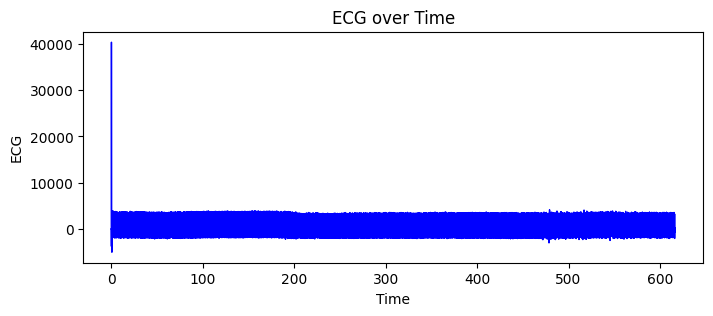

In [8]:
fig = plt.figure(figsize=[8, 3])
t = np.linspace(start = 0, stop = len(ecg_1) / fs, num = len(ecg_1), endpoint=False)
plt.plot(t, ecg_1, linestyle='-', color='blue', marker='', linewidth=1)
plt.xlabel('Time')
plt.ylabel('ECG')
plt.title('ECG over Time')
plt.show()

In [4]:
# run cell to test your implementation
assert len(t) == len(ecg_1), "t must have the same length as ecg_1"
assert t[1] == 1 / fs and t[-1] == (len(ecg_1) - 1) / fs, "Check that t is generated according to fs"
assert fig.get_figheight() == 3 and fig.get_figwidth() == 8, "Check the size of the figure"
assert np.all(fig.axes[0].xaxis.get_data_interval() == np.array([0, 616.36328125])), "Check that you plot the ecg over the time vector"
assert np.all(fig.axes[0].yaxis.get_data_interval() == np.array([-5010, 40364])), "Check that you plot ecg_1"
assert len(fig.axes[0].get_xlabel()) != 0 and len(fig.axes[0].get_ylabel()) != 0, "Check your x and y labels"
assert len(fig.axes[0].title.get_text()), "Check the  figure's title"

#### 2. Create a function ``extract_r_peaks`` which takes ``ecg`` and ``fs`` as parameters and calculates the R peaks of ``ecg``:
* ``ecg``: ``numpy.ndarray`` containing the raw ECG data
* ``fs``: sampling frequency of ``ecg``
* Check if ``fs`` is of type ``int``. If not, convert it to ``int``.
* Use the [NeuroKit.ecg_clean()](https://neuropsychology.github.io/NeuroKit/functions/ecg.html#neurokit2.ecg.ecg_clean) to remove noise and improve peak-detection accuracy. Use "neurokit" as ``method``.
* Use [NeuroKit.ecg_peaks()](https://neuropsychology.github.io/NeuroKit/functions/ecg.html#ecg-peaks) to identify R peaks in the cleaned ECG version. Use "neurokit" as method.
* The function should return the cleaned ecg and the array with R peak locations as samples (in this order) as tuple

**Hint**: If a function has multiple return values but you are only interested in some of them you can ignore return values using a placeholder ``_`` (in the following example the second return value is ignored): ``val_1, _, val_3 = some_func()``

In [9]:
def extract_r_peaks(ecg, fs):
  if not isinstance(fs, int):
    fs = int(fs)
  ecg_cleaned = nk.ecg_clean(ecg, sampling_rate=fs , method='neurokit')
  signals, info = nk.ecg_peaks(ecg_cleaned, sampling_rate=fs, method='neurokit', correct_artifacts=True, show=True)
  return ecg_cleaned, info["ECG_R_Peaks"]

In [ ]:
# run cell to test your implementation
test = extract_r_peaks(ecg_1, fs)
assert type(test) == tuple, "Check if you return a tuple of the cleaned ecg and the array with r peak locations"
assert np.max(ecg_1) > np.max(test[0]) and np.min(ecg_1) < np.min(test[0]), "Check that you return the cleaned ecg and not the original ecg"
assert type(test[1]) == np.ndarray and np.shape(test[1]) == (876,), "Check that you return only the array of r peak locations"
assert np.sum(test[1]) < 69896028, "Check that you apply ecg_peaks() to the cleaned ecg"

#### 3. Create a figure that visualizes ``ecg_1`` and its respective R peaks. To do so:
* Create a figure called ``fig`` with an appropriate size
* Plot the cleaned version of ``ecg_1`` over time
* Mark every identified R peak with an individual marker. You can use for example [matplotlib.pyplot.scatter](https://matplotlib.org/stable/tutorials/introductory/pyplot.html) for this.
* Add a legend to your figure such that the ECG and R peaks are identified. Check out what you have to change in your code when plotting the ECG and R peaks.
* Set the x- and y-label as well as the title of the figure according to the data

**Hint**: The function ``extract_r_peaks()`` returns an array of samples, indicating the specific sample positions where the R peaks were detected in the ECG.

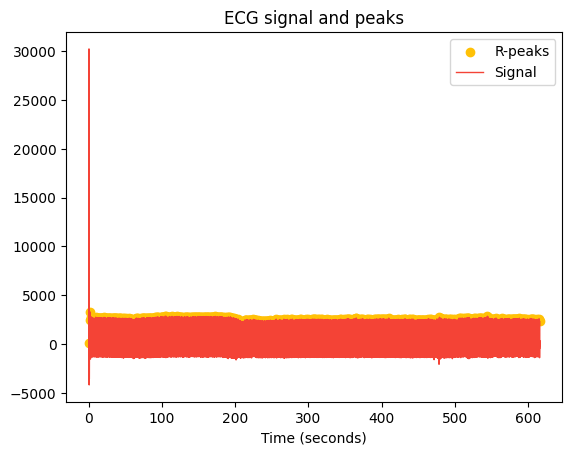

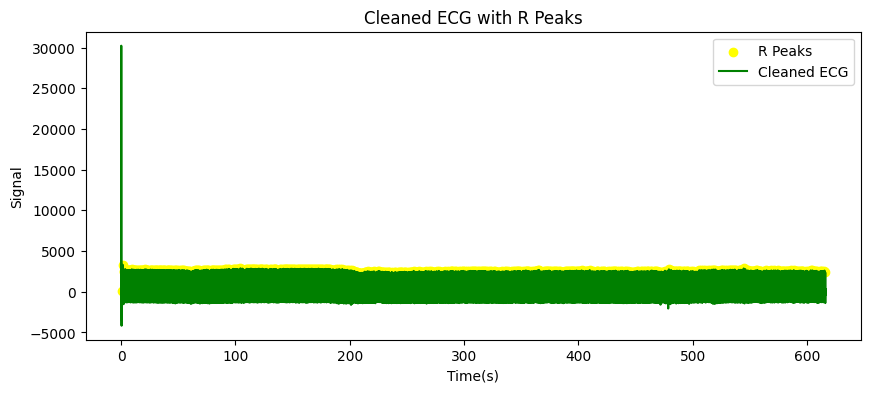

In [10]:
ecg_cleaned, r_peaks = extract_r_peaks(ecg_1, fs)
fig, ax = plt.subplots(figsize=[10, 4])
t = np.linspace(start = 0, stop= len(ecg_cleaned)/fs, num = len(ecg_cleaned), endpoint = False)
ax.scatter(t[r_peaks], ecg_cleaned[r_peaks], color='yellow', marker='o', label='R Peaks')
ax.plot(t, ecg_cleaned, color='green', label='Cleaned ECG')
ax.set_xlabel('Time(s)')
ax.set_ylabel('Signal')
ax.set_title('Cleaned ECG with R Peaks')
ax.legend()
plt.show()

In [ ]:
# run cell to test your implementation
assert np.all(fig.axes[0].xaxis.get_data_interval() == np.array([0, 616.36328125])), "Check that you plot the ecg over the time vector"
assert fig.axes[0].yaxis.get_data_interval()[0] < -4100 and fig.axes[0].yaxis.get_data_interval()[1] > 30200, "Check that you plot the cleaned version of ecg_1"
assert len([child for child in fig.axes[0].get_children() if type(child) == matplotlib.collections.PathCollection or type(child) == matplotlib.lines.Line2D]) >=2, "Check if you visualized ecg and r peaks"
assert fig.axes[0].axes.get_legend() is not None, "Check if you added a legend"
assert len(fig.axes[0].axes.get_legend().get_texts()) == 2, "Check if you set a label for ecg and r peaks"
assert len(fig.axes[0].get_xlabel()) != 0 and len(fig.axes[0].get_ylabel()) != 0, "Check your x and y labels"
assert len(fig.axes[0].title.get_text()), "Check the  figure's title"

#### 4. Create a function called ``calc_hr`` that takes ``r_peaks`` and ``fs`` as parameters and calculates the heart rate from ``r_peaks``:
* ``r_peaks``: ``numpy.ndarray`` with R peak locations of an ecg as samples
* ``fs``: sampling frequency of the ECG
* The function should return an array containing the heart rate in beats per minute (bpm) for every RR interval individually

In [16]:
def calc_hr(r_peaks, fs):
  rr_intervals = np.diff(r_peaks)
  hr = (60 * fs) / rr_intervals
  return hr

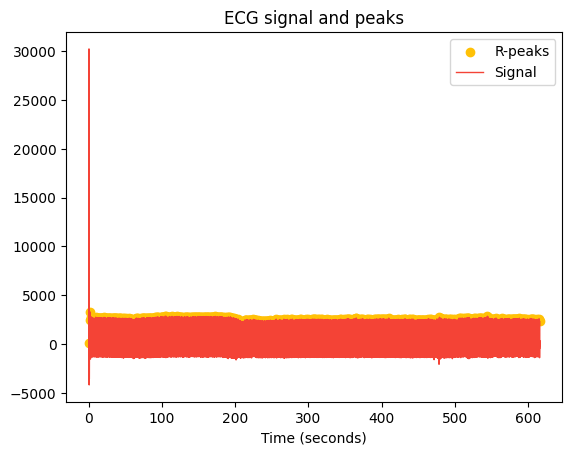

In [17]:
# run cell to test your implementation
_, r_peaks = extract_r_peaks(ecg_1, fs)
hr = calc_hr(r_peaks, fs)
assert type(hr) == np.ndarray, "Check that you return an array of heart rates"
assert len(hr) == 875, "Check that you calculate the heart rate for every rr interval"
assert np.mean(hr) > 84 and np.mean(hr) < 86, "Check that you convert the heart rate into beats per minute"

#### 5. Create a function ``correct_outlier`` that takes ``hr`` as parameter and eliminates the outliers of ``hr``:
* ``hr``: ``numpy.ndarray`` containing the heart rate in beats per minute (bpm) for every RR interval individually
* The function should return an array that includes only those elements of ``hr`` which are within 2 standard deviations from the mean

In [12]:
def correct_outlier(hr):
  mean = np.mean(hr)
  std = np.std(hr)
  hr_cleaned = hr[(hr >= mean - 2 * std) & (hr <= mean + 2 * std)]
  return hr_cleaned

AssertionError: Check that you return an array which does not include the outliers

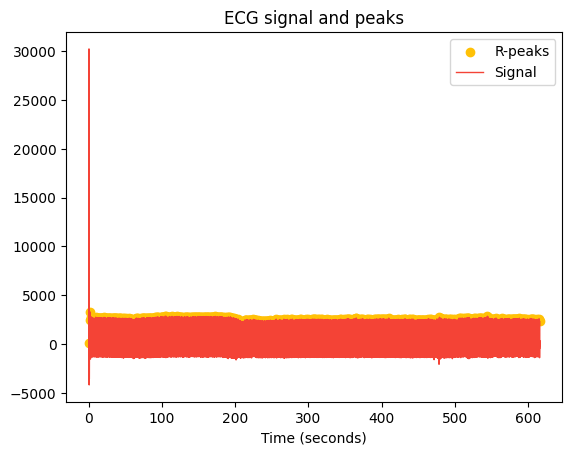

In [19]:
# run cell to test your implementation
_, r_peaks_1 = extract_r_peaks(ecg_1, fs)
hr_1 = calc_hr(r_peaks_1, fs)
hr_cleaned_1 = correct_outlier(hr_1)
assert len(hr_cleaned_1) == 823, "Check that you return an array which does not include the outliers"
assert np.max(hr_cleaned_1) < 102 and np.min(hr_cleaned_1) > 71, "Check that you remove smaller and larger outliers"

#### 6. Create a figure with two subplots that visualizes the heart rate **distribution** before and after outlier correction of ``ecg_1``. To do so:
* Create a ``list`` called ``bins``which includes all values between 60 and 115 with stepsize 2 in between two consecutive numbers
* Create a figure with appropriate size and two subplots next to each other using [matplotlib.pyplot.subplots](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html). For easier usage afterward, save its return values in variables called ``fig`` and ``axs``.
* Plot in the left subplot the histogram of the original heart rate distribution of ``ecg_1`` using ``bins``
* Plot in the right subplot the histogram of the outlier corrected heart rate distribution of ``ecg_1`` using ``bins``
* Set x- and y-axis labels as well as the titles for both subplots according to the data

**Hint**: Check if the ``sharex`` and ``sharey`` parameters of [matplotlib.pyplot.subplots](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html) can improve the comparability of your distributions.

array([<Axes: title={'center': 'Original Heart Rate Distribution'}, xlabel='Heart Rate (bpm)', ylabel='Frequency'>,
       <Axes: title={'center': 'Corrected Heart Rate Distribution'}, xlabel='Correted Heart Rate (bpm)', ylabel='Frequency'>],
      dtype=object)

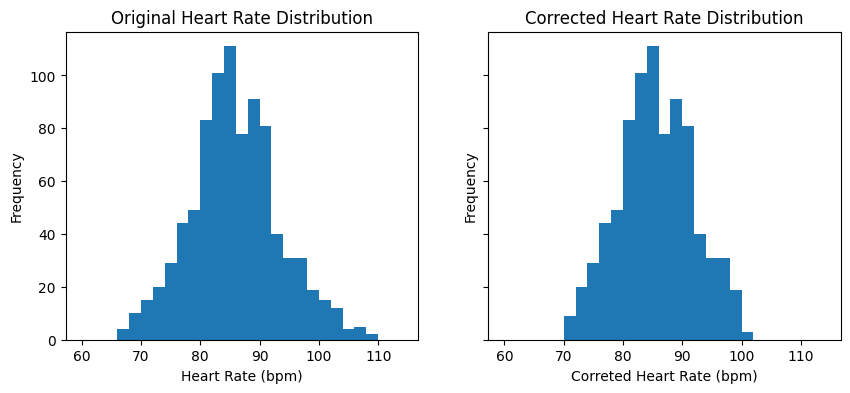

In [25]:
fig, axs = plt.subplots(1, 2, figsize=[10, 4], sharex=True, sharey=True)
bins = np.arange(60, 116, 2)
axs[0].hist(hr_1, bins=bins)
axs[0].set_xlabel('Heart Rate (bpm)')
axs[0].set_ylabel('Frequency')
axs[0].set_title('Original Heart Rate Distribution')

axs[1].hist(correct_outlier(hr_1), bins=bins)
axs[1].set_xlabel('Correted Heart Rate (bpm)')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Corrected Heart Rate Distribution')
axs

In [23]:
# run cell to test your implementation
assert len(bins) == 28 and bins[0] == 60 and bins[-1] == 114, "Check your bin creation parameters and the endpoints"
assert len(fig.axes) == 2, "Check that you created a figure with two subplots"
assert len([0 for child in fig.axes[0].get_children() + fig.axes[1].get_children() if type(child) == matplotlib.patches.Rectangle]) == 56, "Check that you used the variable bins as the bins parameter"
val_1 = sum([child.get_height() for child in fig.axes[0].get_children()[:-1] if type(child) == matplotlib.patches.Rectangle])
val_2 = sum([child.get_height() for child in fig.axes[1].get_children()[:-1] if type(child) == matplotlib.patches.Rectangle])
assert val_1 != val_2, "Check if you plot two different distributions"
assert len(fig.axes[0].get_xlabel()) != 0 and len(fig.axes[0].get_ylabel()) != 0, "Check the left sublot's x and y labels"
assert len(fig.axes[1].get_xlabel()) != 0 and len(fig.axes[1].get_ylabel()) != 0, "Check the right subplot's x and y labels"
assert len(fig.axes[0].title.get_text()), "Check the left subplot's title"
assert len(fig.axes[1].title.get_text()), "Check the right subplot's title"

#### 7. Create a figure with two subplots that visualizes the heart rate distributions before and after outlier correction as box plots of ``ecg_1`` and ``ecg_2``. To do so:
* Create a figure with appropriate size and two subplots next to each other. Save its return values in variables called ``fig`` and ``axs``.
* Create in the left subplot two boxplots visualizing the original heart rate distributions of ``ecg_1`` and ``ecg_2``. Set the labels accordingly.
* Create in the right subplot two boxplots visualizing the outlier corrected heart rate distributions of ``ecg_1`` and ``ecg_2``. Set the labels accordingly.
* Set x- and y-axis labels as well as the titles for both subplots according to the data

/tmp/ipython-input-28-2973800734.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axs[0].boxplot([ecg_1, ecg_2], labels=['ECG 1', 'ECG 2'])
/tmp/ipython-input-28-2973800734.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axs[1].boxplot([correct_outlier(hr_1), correct_outlier(hr_2)], labels=['ECG 1', 'ECG 2'])


array([<Axes: title={'center': 'Original Heart Rate Distributions'}, xlabel='ECG', ylabel='Heart Rate (bpm)'>,
       <Axes: title={'center': 'Corrected Heart Rate Distributions'}, xlabel='ECG', ylabel='Heart Rate (bpm)'>],
      dtype=object)

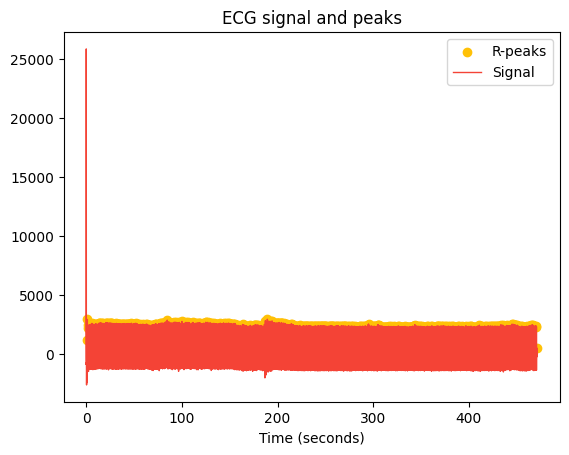

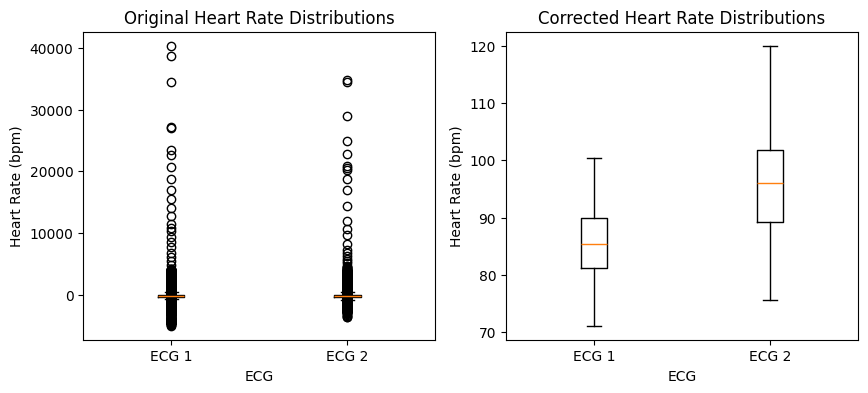

In [28]:
_, r_peaks_2 = extract_r_peaks(ecg_2, fs)
hr_2 = calc_hr(r_peaks_2, fs)
fig = plt.figure(figsize=[10, 4])
axs = fig.subplots(1, 2)
axs[0].boxplot([ecg_1, ecg_2], labels=['ECG 1', 'ECG 2'])
axs[0].set_xlabel('ECG')
axs[0].set_ylabel('Heart Rate (bpm)')
axs[0].set_title('Original Heart Rate Distributions')

axs[1].boxplot([correct_outlier(hr_1), correct_outlier(hr_2)], labels=['ECG 1', 'ECG 2'])
axs[1].set_xlabel('ECG')
axs[1].set_ylabel('Heart Rate (bpm)')
axs[1].set_title('Corrected Heart Rate Distributions')
axs

In [29]:
# run cell to test your implementation
assert len(fig.axes) == 2, "Check that you created a figure with two subplots"
assert len([0 for child in fig.axes[0].get_children() if type(child) == matplotlib.lines.Line2D]) > 10, "Check that you plot a boxplot in the left subplot"
assert len([0 for child in fig.axes[1].get_children() if type(child) == matplotlib.lines.Line2D]) > 10, "Check that you plot a boxplot in the right subplot"
assert np.all(fig.axes[0].yaxis.get_data_interval() != fig.axes[1].yaxis.get_data_interval()), "Check that you plot both datatset (original and corrected) separately in the two subplots"
assert fig.axes[0].get_xticklabels()[0].get_text() != "1" and fig.axes[1].get_xticklabels()[0].get_text() != "2", "Check that you set the labels in the left subplot"
assert fig.axes[1].get_xticklabels()[0].get_text() != "1" and fig.axes[1].get_xticklabels()[0].get_text() != "2", "Check that you set the labels in the right subplot"
assert len(fig.axes[0].get_xlabel()) != 0 and len(fig.axes[0].get_ylabel()) != 0, "Check the left sublot's x and y labels"
assert len(fig.axes[1].get_xlabel()) != 0 and len(fig.axes[1].get_ylabel()) != 0, "Check the right subplot's x and y labels"
assert len(fig.axes[0].title.get_text()), "Check the left subplot's title"
assert len(fig.axes[1].title.get_text()), "Check the right subplot's title"